In [ ]:
%load_ext autoreload
%autoreload 2
import sys
import os
project_root = os.path.abspath("")
if project_root not in sys.path:
    sys.path.append(project_root)
import pandas as pd
import numpy as np 
from pathlib import Path
import utils.metrics_utils
from utils.metrics_utils import * 
import harp
from ipywidgets import widgets
from IPython.display import display

%matplotlib widget

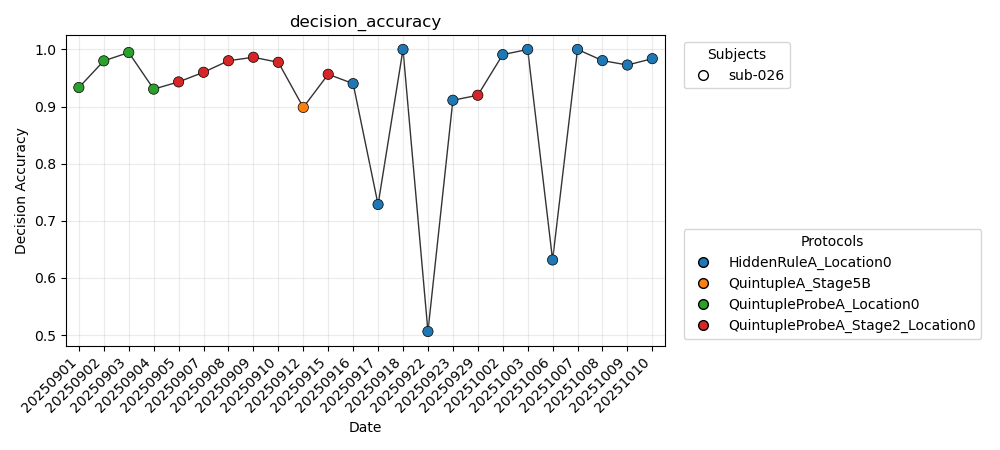

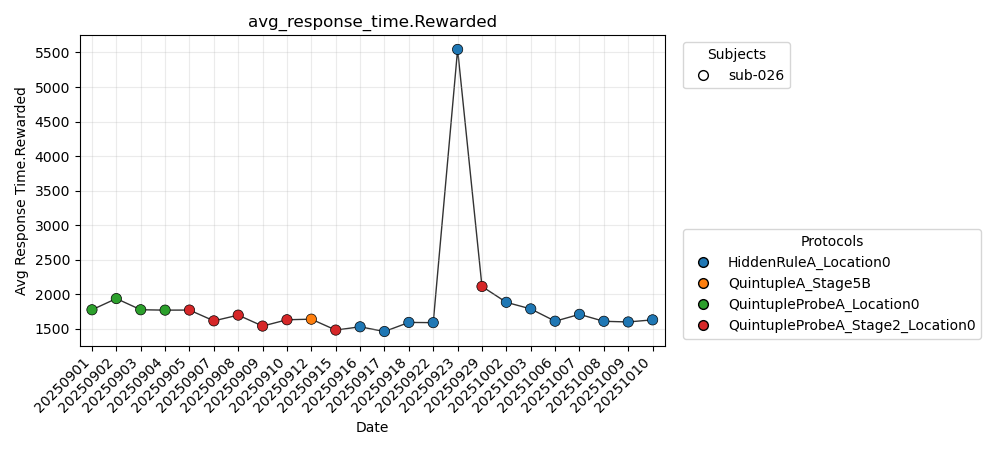

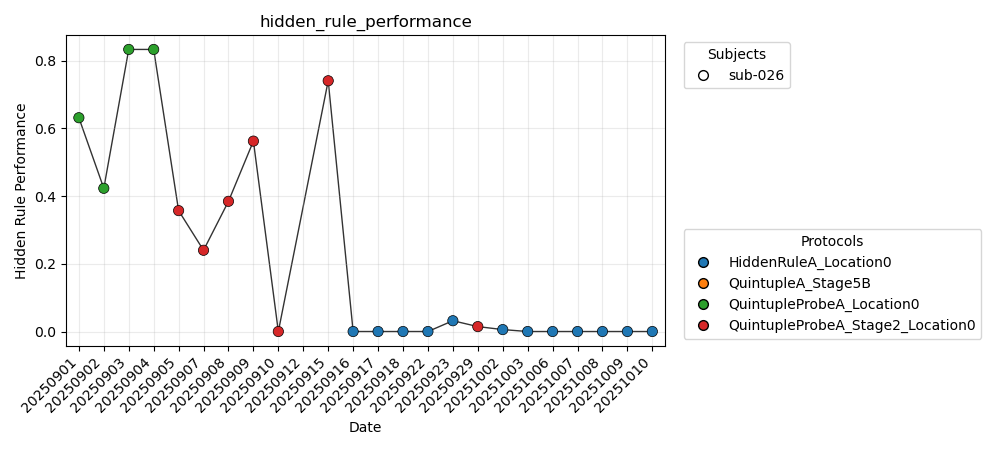

In [5]:
figs = plot_behavior_metrics(
    subjids=[26],
    dates=(20250901, 20251010),
    variables=[
        "decision_accuracy",
        "avg_response_time.Rewarded", 
        "hidden_rule_performance"
    ],
    protocol_filter=None,
    compute_if_missing=False, 
    verbose=True
)

In [9]:
# Run all behavioral metrics. Can be run on one or multiple subjects and dates ([...] for multiple subject, or None for all subjects). Specify protocol to filter sessions (None for all protocols).
all_metrics = batch_run_all_metrics_with_merge(subjids=None, dates=[20250901, 20250902, 20250903, 20250904, 20250905, 20250906, 20250907, 20250908, 20250909, 20250910, 20250911, 20250912, 20250913, 20250914, 20250915, 20250916, 20250917, 20250918, 20250919, 20250920, 20250921, 20250922, 20250923, 20250924, 20250925, 20250926, 20250927, 20250928, 20250929, 20250930, 20251001, 20251002, 20251003, 20251004, 20251005, 20251006, 20251007, 20251008, 20251009, 20251010], protocol=None)

Found 6 subject directories.

--- Decision Accuracy ---
Decision Accuracy: 72/72 = 1.000

--- Premature Response Rate ---
Premature Response Rate: 85/87 = 0.977

--- Response-Contingent False Alarm Rate ---
Response-Contingent False Alarm Rate: 85/157 = 0.541

--- Global False Alarm Rate ---
Global False Alarm Rate: 85/163 = 0.521

--- FA Odor Bias ---
FA Odor Bias for FA Time In:
OdorA: 7/7 FA, Bias: 1.706
OdorB: 6/6 FA, Bias: 1.706
OdorC: 8/19 FA, Bias: 0.718
OdorD: 10/17 FA, Bias: 1.003
OdorE: 10/18 FA, Bias: 0.948
OdorF: 4/8 FA, Bias: 0.853
OdorG: 6/12 FA, Bias: 0.853

--- FA Position Bias ---
FA Position Bias for FA Time In:
Position 1: 9/21 FA, Bias: 0.731
Position 2: 12/33 FA, Bias: 0.620
Position 3: 9/11 FA, Bias: 1.396
Position 4: 11/12 FA, Bias: 1.564
Position 5: 10/10 FA, Bias: 1.706

--- Sequence Completion Rate ---
Sequence Completion Rate: 76/163 = 0.466

--- Odor Abortion Rate ---
OdorA: 7/62 abortions, Rate: 0.113
OdorB: 6/40 abortions, Rate: 0.150
OdorC: 19/93 abortion

In [12]:
results = load_session_results(26, 20250915)

In [14]:
metrics = run_all_metrics(results)

Manifest (before adjustment): {'created_at': '2025-10-15T16:48:15.051957', 'session': {'multi_run': True, 'subject_id': '26', 'date': '20250915', 'runs': [{'run_id': 1, 'root': '/ceph/harris/hypnose/rawdata/sub-026_id-077/ses-126_date-20250915/behav/2025-09-15T13-06-30', 'stage': {'stage_name': 'QuintupleProbeA_Stage2_Location0', 'hidden_rule_index': 0}}]}, 'paths': {'hypnose_dir': '/ceph/harris/hypnose', 'rawdata_dir': '/Volumes/harris/hypnose/derivatives/rawdata', 'sub_folder': 'sub-026_id-077', 'ses_folder': 'ses-126_date-20250915'}, 'tables': {'initiated_sequences': 'initiated_sequences.csv', 'non_initiated_sequences': 'non_initiated_sequences.csv', 'non_initiated_odor1_attempts': 'non_initiated_odor1_attempts.csv', 'completed_sequences': 'completed_sequences.csv', 'completed_sequences_with_response_times': 'completed_sequences_with_response_times.csv', 'completed_sequence_rewarded': 'completed_sequence_rewarded.csv', 'completed_sequence_unrewarded': 'completed_sequence_unrewarded.

In [3]:
da = decision_accuracy(results)

Decision Accuracy: 132/138 = 0.957


In [4]:
pre_res_rate = premature_response_rate(results)

Premature Response Rate: 51/54 = 0.944


In [5]:
res_cont_FA = response_contingent_FA_rate(results)

Response-Contingent False Alarm Rate: 51/189 = 0.270


In [ ]:
glob_FA_rate_results = global_FA_rate(results)

In [8]:
fa_odor_bias_result = FA_odor_bias(results)

FA Odor Bias for FA Time In:
OdorA: 1/2 FA, Bias: 1.421
OdorB: 2/2 FA, Bias: 2.842
OdorC: 4/13 FA, Bias: 0.874
OdorD: 0/7 FA, Bias: 0.000
OdorE: 4/8 FA, Bias: 1.421
OdorF: 4/13 FA, Bias: 0.874
OdorG: 4/9 FA, Bias: 1.263


In [9]:
fa_position_bias = FA_position_bias(results)

FA Position Bias for FA Time In:
Position 1: 1/5 FA, Bias: 0.568
Position 2: 4/18 FA, Bias: 0.632
Position 3: 4/14 FA, Bias: 0.812
Position 4: 7/13 FA, Bias: 1.530
Position 5: 3/4 FA, Bias: 2.132


In [10]:
completed_seqs = sequence_completion_rate(results)

Sequence Completion Rate: 142/196 = 0.724


In [ ]:
odor_abortion_rates_result = odorx_abortion_rate(results)

In [ ]:
hidden_rule_performance_results = hidden_rule_performance(results)


In [ ]:
hidden_rule_detection_results = hidden_rule_detection_rate(results)

In [ ]:
choice_timeouts = choice_timeout_rate(results)

In [ ]:
avg_sampling_results = avg_sampling_time_odor_x(results)

In [ ]:
avg_sampling_completed_seq_results = avg_sampling_time_completed_sequence(results)

In [ ]:
avg_sampling_aborted_sequence_result = avg_sampling_time_aborted_sequence(results)
# Note: different from the one calculated in the merge summary, as this does not drop poke times < minimum_sampling_time_ms

In [ ]:
avg_sampling_initiation = avg_sampling_time_initiation_abortion(results)

In [ ]:
abortion_rate_results = abortion_rate_positionX(results)


In [7]:
avg_response_time_results = avg_response_time(results)


Rewarded: 1482.9 ms (n=132)
Unrewarded: 1602.9 ms (n=6)
Reward Timeout: 11426.0 ms (n=4)
Average Response Time (Rewarded + Unrewarded): 1488.1 ms (n=138)


In [ ]:
FA_response_time_results = FA_avg_response_times(results)


In [ ]:
resposne_rate_results = response_rate(results)

In [ ]:
stop_preference = manual_vs_auto_stop_preference(results)

In [ ]:
non_initiated_FA_rate_results = non_initiated_FA_rate(results)

In [ ]:
non_initiation_odor_bias_results = non_initiation_odor_bias(results)

In [ ]:
odor_init_bias_results = odor_initiation_bias(results)

In [ ]:
fa_abortion_stats_results = fa_abortion_stats(results)